In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

create three blobs with 3 centers, 2 features and 500 data points

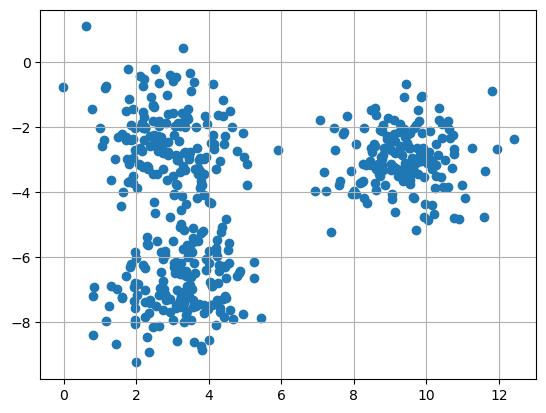

In [2]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 30)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
from sklearn.preprocessing import MinMaxScaler
# scale the data to be range -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

In [4]:
def inital_clusters(k,X):
    clusters = {}
    np.random.seed(23)
    for idx in range(k):
        # create k random points with coordinates ranging from -1 to 1
        center = np.random.uniform(low = -1, high = 1,size = X.shape[1])
        points = []
        cluster = {
            'center' : center,
            'points' : [] }
        clusters[idx] = cluster
    return clusters

In [5]:
clusters = inital_clusters(3,X_scaled)

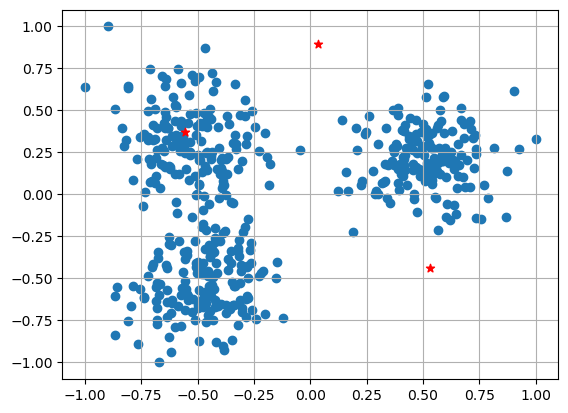

In [6]:
plt.scatter(X_scaled[:,0],X_scaled[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [9]:
# calculate the Euclidean distance
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))


def assign_clusters(X, clusters,k):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]

        for i in range(k):
            # for each cluster, calc the distance between the point and the centroid
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist) # find the closest centroid 
        clusters[curr_cluster]['points'].append(curr_x) # appoint data points to clusters
    return clusters

def update_clusters(X, clusters,k):
    # Calculates the new centroid by taking the mean of the points in the cluster
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters
    
def pred_cluster(X, clusters,k):
    # predict the cluster for each data point based on the final centroids
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [11]:
clusters = assign_clusters(X_scaled,clusters,3)
clusters = update_clusters(X_scaled,clusters,3)
pred = pred_cluster(X_scaled,clusters,3)

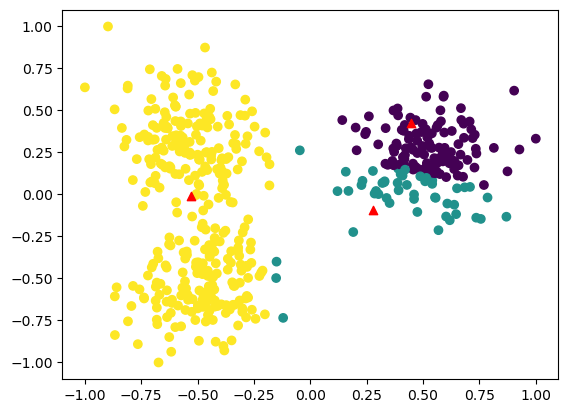

In [12]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

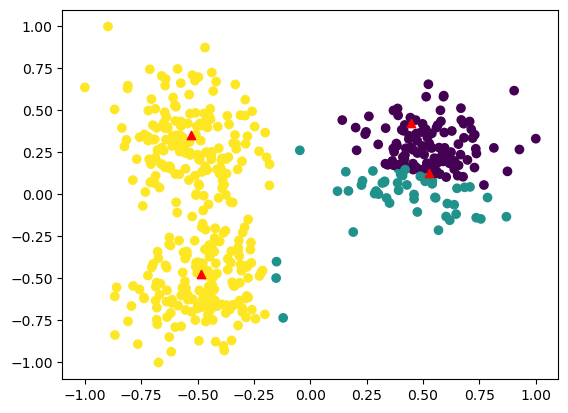

In [14]:
clusters = inital_clusters(4,X_scaled)
clusters = assign_clusters(X_scaled,clusters,4)
clusters = update_clusters(X_scaled,clusters,4)

plt.scatter(X_scaled[:,0],X_scaled[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

Challenges with K-Means Clustering

Choosing the Right Number of Clusters (k): One of the biggest challenges is deciding how many clusters to use.

Sensitive to Initial Centroids: The final clusters can vary depending on the initial random placement of centroids.

Non-Spherical Clusters: K-Means assumes that the clusters are spherical and equally sized. This can be a problem when the actual clusters in the data are of different shapes or densities.

Outliers: K-Means is sensitive to outliers, which can distort the centroid and, ultimately, the clusters.